In [1]:
import xml.etree.ElementTree as ET
import bz2
# Read data into xml etree
with bz2.open('./data/gp2d.xml.bz2', 'rb') as bf:
    tree = ET.parse(bf)
root = tree.getroot()

In [9]:
rows = []
for text in root.findall('text'):    
    # Join multiple sentences from same text issue
    # curr_sent = []    
    for sent in text.getiterator('sentence'):
        sent_id = sent.get('id')
        
        for word in sent.getiterator('w'):
            r = word.attrib
            r['sent_id'] = sent_id
            r['word'] = word.text
            rows.append(r)

In [71]:
import pandas as pd
whole_df = pd.DataFrame(rows)

In [72]:
whole_df.head()

,blingbring,complemgram,compwf,dephead,deprel,lemma,lex,msd,pos,prefix,ref,sense,sent_id,sentiment,sentimentclass,suffix,swefn,word
0,|,|,|,2,DT,|åtta|,|åtta..nl.1|,RG.NOM,RG,|,1,|åtta..1:-1.000|,9a33d49f-9a97adab,0.6619,neutral,|,|,Åtta
1,|förfarande|mästare|planmässighet|slughet|,|,|,3,SS,|politiker|,|politiker..nn.1|,NN.UTR.PLU.IND.NOM,NN,|,2,|politiker..1:-1.000|,9a33d49f-9a97adab,0.4601,neutral,|,|People_by_vocation|,politiker
2,|ledning|lägebestämning|lägeförändring|,|ställ..nn.1+le..vb.1:2.386e-13|ställa..vb.1+l...,|ställ+ler|,NaN,ROOT,|ställa|ställa upp|,|ställa..vb.1|ställa_upp..vbm.1|,VB.PRS.AKT,VB,|ställ..nn.1|ställa..vb.1|,3,|ställa..1:0.969|uppställa..1:0.021|ställa..4:...,9a33d49f-9a97adab,0.99219,neutral,|le..vb.1|,|Placing|,ställer
3,|,|,|,3,PL,|upp|ställa upp:3|,|upp..ab.1|ställa_upp..vbm.1:3|,PL,PL,|,4,|upp..1:1.000|uppställa..1:3:0.000|ställa_upp....,9a33d49f-9a97adab,0.0614,neutral,|,|,upp
4,|,|,|,3,OA,|i|,|i..pp.1|,PP,PP,|,5,|i..2:-1.000|,9a33d49f-9a97adab,0.836,neutral,|,|,i


In [82]:
df = whole_df[['word', 'sent_id', 'pos', 'sense', 'msd']].copy()

In [89]:
import re

def first_lemma(word_lemma):
    word, lemma = word_lemma
    m = re.findall(r'\|(\w+)\|', lemma)
    if len(m) >= 1:
        return m[0]
    else:
        return word

df['first_lemma'] = whole_df[['word', 'lemma']].apply(first_lemma, axis=1)

In [90]:
print("Unique lemmas:", len(df['first_lemma'].unique()))
print("Unique word forms:", len(df['word'].unique()))

Unique lemmas: 43566
Unique word forms: 64340


In [91]:
sent_group = df.groupby('sent_id')
word_count = sent_group['word'].count()

In [92]:
print("Min word count:", word_count.min())
print("Mean word count:", word_count.mean())
print("Median word count:", word_count.median())
print("Max word count:", word_count.max())

Min word count: 1
Mean word count: 10.928627090920314
Median word count: 10.0
Max word count: 140


In [101]:
" ".join(df[df['sent_id'] == word_count.argmax()]['word'])

'Vecka 33 : Många förslag om skolan Vecka 32 : Spurten har börjat Vecka 31 : Mycket politik på Pride Vecka 27-30 : Sommar Vecka 26 : Nu börjar årets politiska vecka Vecka 25 : Tidningar och tv är politik Vecka 24 : Partierna pratar feminism Vecka 23 : Många klagade på mötet Vecka 22 : Många är ledsna efter valet Vecka 21 : Européer går och röstar Vecka 20 : Partiets möten stoppas Vecka 19 : Valet har börjat Vecka 18 : De lovar sänkt skatt Vecka 17 : Bråk om nya vapen Vecka 16 : Påsk Vecka 15 : Bråk om statens pengar Vecka 14 : Nya förslag om pengarna Vecka 13 : Vi lär oss om EU Vecka 12 : Knäckebröd startade debatt Vecka 11 : Mindre bråk om skolan Vecka 10 : Alla pratar om försvaret'

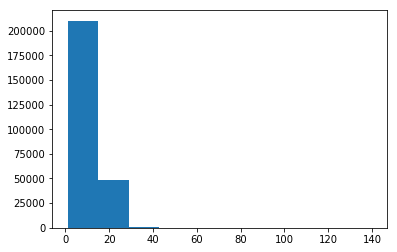

In [96]:
import matplotlib.pyplot as plt

plt.hist(word_count)
plt.show()

In [ ]:
import xml.etree.ElementTree as ET
import bz2
import random


# Only sample ~ 30% of the data
sample_percent = 0.3
rows = []
keep_attrs = ['lemma', 'msd', 'pos']
keep_sample = False
with bz2.open('./data/gp2013.xml.bz2', 'rb') as bf:
    for event, elem in ET.iterparse(bf, events=('start', 'end', 'start-ns', 'end-ns')):
        if event == "start" and elem.tag == "sentence":
            keep_sample = random.random() < sample_percent
            sent_id = elem.get('id')            
        
        if event == "start" and keep_sample and elem.tag == "w":
            r = {k: elem.attrib[k] for k in keep_attrs}
            r['sent_id'] = sent_id
            r['word'] = elem.text
            rows.append(r)

0.34527785468109107

In [21]:
import pandas as pd

pd.DataFrame(rows)

""
